In [119]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


# Body composition anlysis


Load data

In [106]:
clinical_data = pd.read_excel('/Users/zilianghong/Documents/GitHub/IPMN-Tissue-Analysis/IPMN_labels_t1.xlsx')
clinical_data = clinical_data.drop(columns=['follow-up information','Unnamed: 4','Unnamed: 5'])
clinical_data = clinical_data.rename(columns={'Unnamed: 0': 'name'})
clinical_data['name'] = clinical_data['name'].str.replace('.nii.gz', '', regex=False)
clinical_data['name'] = clinical_data['name'].apply(lambda x: x.upper())
clinical_data

,name,pathology labels,risk assessment
0,CAD_03,no cyst/normal,0.0
1,CAD_102,low grade,1.0
2,CAD_107,cancer,2.0
3,CAD_110,cancer,2.0
4,CAD_113,low grade,1.0
...,...,...,...
719,NU_186,benign/other pathology,0.0
720,NU_187,NaN,1.0
721,NU_188,low grade,1.0
722,NU_189,low grade,1.0


In [108]:
tissue_data = pd.read_csv('/Users/zilianghong/Documents/GitHub/IPMN-Tissue-Analysis/tissue_from_t1.csv')
tissue_data['name'] = tissue_data['name'].str.replace('.nii.gz', '', regex=False)
tissue_data['name'] = tissue_data['name'].apply(lambda x: x.upper())

In [109]:
tissue_data

,name,visceral fat,subcutaneous fat,muscle
0,EMC_01_033,1451.462561,2072.005949,4676.051779
1,NU_146,3559.199295,4747.294375,2806.076577
2,EMC_01_002,833.514312,5553.646453,2006.377009
3,MCA_55,1740.252163,3500.343764,2342.700266
4,CAD_234,1312.721150,488.704400,809.097135
...,...,...,...,...
719,NU_132,2192.550422,6094.320211,2265.280641
720,NYU_0169,3846.338180,3791.444521,2990.031712
721,NYU_0125,561.477524,1800.142883,938.817001
722,CAD_113,108.354041,99.724248,47.704675


In [110]:
merged_data = pd.merge(tissue_data, clinical_data, on='name', how='inner')
merged_data

,name,visceral fat,subcutaneous fat,muscle,pathology labels,risk assessment
0,EMC_01_033,1451.462561,2072.005949,4676.051779,no cyst/normal,0.0
1,NU_146,3559.199295,4747.294375,2806.076577,NaN,1.0
2,EMC_01_002,833.514312,5553.646453,2006.377009,no cyst/normal,0.0
3,MCA_55,1740.252163,3500.343764,2342.700266,cancer,2.0
4,CAD_234,1312.721150,488.704400,809.097135,cancer,2.0
...,...,...,...,...,...,...
719,NU_132,2192.550422,6094.320211,2265.280641,NaN,1.0
720,NYU_0169,3846.338180,3791.444521,2990.031712,no cyst/normal,0.0
721,NYU_0125,561.477524,1800.142883,938.817001,no cyst/normal,0.0
722,CAD_113,108.354041,99.724248,47.704675,low grade,1.0


Split them into different groups

In [120]:
high_risk_patients = merged_data[merged_data['risk assessment']>1.9]
low_risk_patients = merged_data[(merged_data['risk assessment'] > 0.9) & (merged_data['risk assessment'] < 1.1)]
non_risk_patients = merged_data[merged_data['risk assessment']<0.1]

groups = ['high risk','low risk','non risk']
risk_assessment_wise = {'high risk':high_risk_patients,'low risk':low_risk_patients,'non risk':non_risk_patients}

Compare v_fat

In [112]:
tissue_name = 'subcutaneous fat'
# tissue_name = 'visceral fat'
# tissue_name = 'muscle'

In [113]:
print("H_risk 1 - Mean:", np.mean(high_risk_patients[tissue_name]), ", Std Dev:", np.std(high_risk_patients[tissue_name]))
print("L_risk 2 - Mean:", np.mean(low_risk_patients[tissue_name]), ", Std Dev:", np.std(low_risk_patients[tissue_name]))
print("N_risk 3 - Mean:", np.mean(non_risk_patients[tissue_name]), ", Std Dev:", np.std(non_risk_patients[tissue_name]))

H_risk 1 - Mean: 2770.6989057494666 , Std Dev: 1992.7263148229865
L_risk 2 - Mean: 3661.3450570776563 , Std Dev: 2093.3918652393877
N_risk 3 - Mean: 3726.2123329839046 , Std Dev: 2263.9299673129085


In [115]:
f_stat, p_value = f_oneway(high_risk_patients[tissue_name], low_risk_patients[tissue_name]) 
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 19.30186680207278
P-value: 1.3704584893459291e-05


In [116]:

f_stat, p_value = f_oneway(high_risk_patients[tissue_name], non_risk_patients[tissue_name]) 
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 15.538781006182715
P-value: 9.982361789919234e-05


In [117]:
f_stat, p_value = f_oneway(low_risk_patients[tissue_name], non_risk_patients[tissue_name]) 
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 0.1001671564222396
P-value: 0.7517609561995786


In [64]:
acute_samples = pancreatitisInfo[pancreatitisInfo['etiology']=='acute']
chronic_samples = pancreatitisInfo[pancreatitisInfo['etiology']=='chronic']
male_samples = pancreatitisInfo[pancreatitisInfo['gender']=='M']
female_samples = pancreatitisInfo[pancreatitisInfo['gender']=='F']

NameError: name 'pancreatitisInfo' is not defined

Segmentation vs groundtureth

C:\Users\sugar\AppData\Local\Temp\ipykernel_41972\1202258715.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(normal_samples['volume_gt(milliliter)'], normal_samples['volume_seg(milliliter)'], s=30,cmap='coolwarm',alpha=0.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


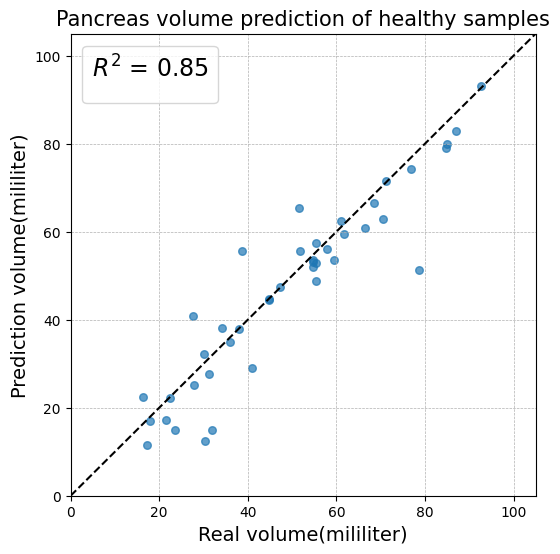

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(normal_samples['volume_gt(milliliter)'], normal_samples['volume_seg(milliliter)'], s=30,cmap='coolwarm',alpha=0.7)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Scatter plot with variable sizes
# plt.scatter(x, y, s=sizes, color="orange", label="Variable sizes")

plt.legend(title=f"$R^2$ = {0.85:.2f}",fontsize=17,title_fontsize=17)
plt.xlim(0, 105)
plt.ylim(0, 105)
plt.plot([0, 200], [0, 200], 'k--')
plt.xlabel("Real volume(mililiter)",fontsize=14)
plt.ylabel("Prediction volume(mililiter)",fontsize=14)
plt.title(f"Pancreas volume prediction of healthy samples",fontsize=15)
plt.show()

C:\Users\sugar\AppData\Local\Temp\ipykernel_41972\1119864013.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(normal_samples['volume_gt(milliliter)'], normal_samples['volume_seg(milliliter)'], s=30,color = 'g',cmap='rainbow',alpha=0.4,label=f"Healthy $R^2$ = {0.85:.2f}")
C:\Users\sugar\AppData\Local\Temp\ipykernel_41972\1119864013.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pancreatitisInfo_filtered['volume_gt(milliliter)'], pancreatitisInfo_filtered['volume_seg(milliliter)'],color ='orange',s=30,cmap='rainbow',alpha=0.8,label=f"Pancreatitis $R^2$ = {0.77:.2f}")


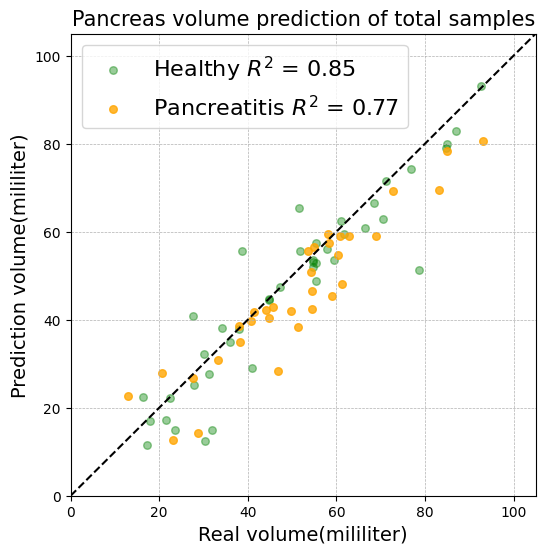

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(normal_samples['volume_gt(milliliter)'], normal_samples['volume_seg(milliliter)'], s=30,color = 'g',cmap='rainbow',alpha=0.4,label=f"Healthy $R^2$ = {0.85:.2f}")
plt.scatter(pancreatitisInfo_filtered['volume_gt(milliliter)'], pancreatitisInfo_filtered['volume_seg(milliliter)'],color ='orange',s=30,cmap='rainbow',alpha=0.8,label=f"Pancreatitis $R^2$ = {0.77:.2f}")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Scatter plot with variable sizes
# plt.scatter(x, y, s=sizes, color="orange", label="Variable sizes")

plt.legend(fontsize=16,title_fontsize=17)
plt.xlim(0, 105)
plt.ylim(0, 105)
plt.plot([0, 200], [0, 200], 'k--')
plt.xlabel("Real volume(mililiter)",fontsize=14)
plt.ylabel("Prediction volume(mililiter)",fontsize=14)
plt.title(f"Pancreas volume prediction of total samples",fontsize=15)
plt.show()

In [7]:
from sklearn.metrics import r2_score

# Sample data for actual and predicted values
actual_values = acute_samples['volume_gt(milliliter)']
predicted_values = acute_samples['volume_seg(milliliter)']

# Calculate R-squared
r_squared = r2_score(actual_values, predicted_values)

print("Acute samples R-squared:", r_squared)

# Sample data for actual and predicted values
actual_values = chronic_samples['volume_gt(milliliter)']
predicted_values = chronic_samples['volume_seg(milliliter)']

# Calculate R-squared
r_squared = r2_score(actual_values, predicted_values)

print("Chronic samples R-squared:", r_squared)

Acute samples R-squared: 0.361072650060521
Chronic samples R-squared: -0.7542077058024439


C:\Users\sugar\AppData\Local\Temp\ipykernel_41972\4054646169.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(acute_samples['volume_gt(milliliter)'], acute_samples['volume_seg(milliliter)'], s=30,color = 'red',cmap='rainbow',alpha=0.8,label=f"Acute $R^2$ = {0.81:.2f}")
C:\Users\sugar\AppData\Local\Temp\ipykernel_41972\4054646169.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(chronic_samples['volume_gt(milliliter)'], chronic_samples['volume_seg(milliliter)'],color ='#8BC34A',s=30,cmap='rainbow',alpha=0.9,label=f"Chronic $R^2$ = {0.72:.2f}")


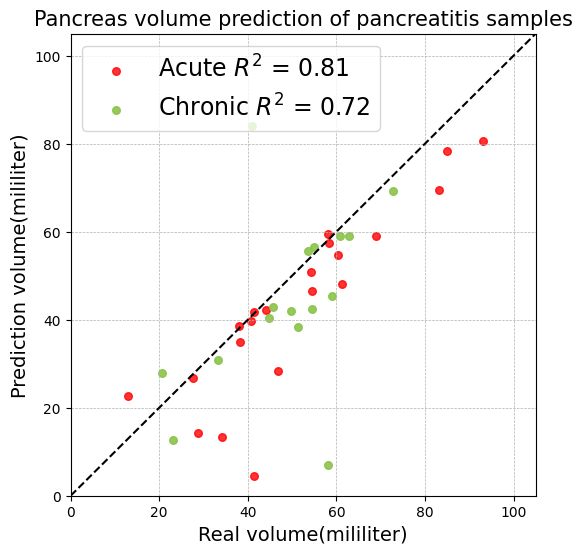

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(acute_samples['volume_gt(milliliter)'], acute_samples['volume_seg(milliliter)'], s=30,color = 'red',cmap='rainbow',alpha=0.8,label=f"Acute $R^2$ = {0.81:.2f}")
plt.scatter(chronic_samples['volume_gt(milliliter)'], chronic_samples['volume_seg(milliliter)'],color ='#8BC34A',s=30,cmap='rainbow',alpha=0.9,label=f"Chronic $R^2$ = {0.72:.2f}")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Scatter plot with variable sizes
# plt.scatter(x, y, s=sizes, color="orange", label="Variable sizes")

plt.legend(fontsize=17,title_fontsize=17)
plt.xlim(0, 105)
plt.ylim(0, 105)
plt.plot([0, 200], [0, 200], 'k--')
plt.xlabel("Real volume(mililiter)",fontsize=14)
plt.ylabel("Prediction volume(mililiter)",fontsize=14)
plt.title(f"Pancreas volume prediction of pancreatitis samples",fontsize=15)
plt.show()

In [4]:
v_list = ['bsa_1(costeff)','bsa_2(mosteller)','height','weight','age','bmi']

In [19]:
def pearson_confidence_interval(r, n, confidence=0.95):
    # Fisher z 变换
    fisher_z = np.arctanh(r)
    
    se = 1 / np.sqrt(n - 3)
    
    z_critical = stats.norm.ppf(1 - (1 - confidence) / 2)
    
    z_lower = fisher_z - z_critical * se
    z_upper = fisher_z + z_critical * se
    
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    
    return r_lower, r_upper

In [20]:
from scipy.stats import pearsonr

group1 = pancreatitisInfo['volume_gt(milliliter)']

v_list = ['height','weight','age','bsa_1(costeff)','bsa_2(mosteller)','bmi']
for v in v_list:
    group2 = pancreatitisInfo[v]
    corr, p_value = pearsonr(group1, group2)
    n = group1.count()
    r_lower, r_upper = pearson_confidence_interval(corr,n)
    print(f"variable: {v}")
    print(f"pearson correlation: {corr}")
    print(f"P value: {p_value}")
    print(f"CI: {r_lower, r_upper}\n")

variable: height
pearson correlation: 0.3843922317161579
P value: 0.011958648506072575
CI: (0.09110450591048372, 0.6163196715726214)

variable: weight
pearson correlation: 0.39573624203627294
P value: 0.009483207706507912
CI: (0.10435653626887861, 0.6245489451314697)

variable: age
pearson correlation: 0.32328985566060114
P value: 0.03676396308149876
CI: (0.02146788464383913, 0.5711055679848757)

variable: bsa_1(costeff)
pearson correlation: 0.40987048733965176
P value: 0.007024676113800261
CI: (0.12101416268029942, 0.634731732598112)

variable: bsa_2(mosteller)
pearson correlation: 0.40225983098630747
P value: 0.00826950617766204
CI: (0.11202451803096843, 0.6292584457419742)

variable: bmi
pearson correlation: 0.2967396095235388
P value: 0.0563542645180368
CI: (-0.007904660578938278, 0.5509790142234889)



In [21]:
group1 = normal_samples['volume_gt(milliliter)']
v_list = ['height','weight','age','bsa_1(costeff)','bsa_2(mosteller)','bmi']
for v in v_list:
    group2 = normal_samples[v]
    corr, p_value = pearsonr(group1, group2)
    r_lower, r_upper = pearson_confidence_interval(corr,42)
    print(f"variable: {v}")
    print(f"pearson correlation: {corr}")
    print(f"P value: {p_value}")
    print(f"CI: {r_lower, r_upper}\n")

variable: height
pearson correlation: 0.6712791299600773
P value: 1.1401998793430278e-06
CI: (0.4615053793645119, 0.8099601663883501)

variable: weight
pearson correlation: 0.5702867494447584
P value: 8.051565130201774e-05
CI: (0.3222020312493208, 0.7450756221165173)

variable: age
pearson correlation: 0.7633311401237611
P value: 4.148154046960069e-09
CI: (0.598177007949461, 0.8662843061427679)

variable: bsa_1(costeff)
pearson correlation: 0.6450653761068158
P value: 3.996838182442202e-06
CI: (0.42432538151883686, 0.7934386485500182)

variable: bsa_2(mosteller)
pearson correlation: 0.635996244879167
P value: 6.0031537382400645e-06
CI: (0.4116332669702517, 0.7876713588771413)

variable: bmi
pearson correlation: 0.23363154756213206
P value: 0.1364591113257604
CI: (-0.075673213336015, 0.501922423913586)



C:\Users\sugar\AppData\Local\Temp\ipykernel_9224\2703249398.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Assesment', y='Pancreas Volume', data=df,palette=palette)


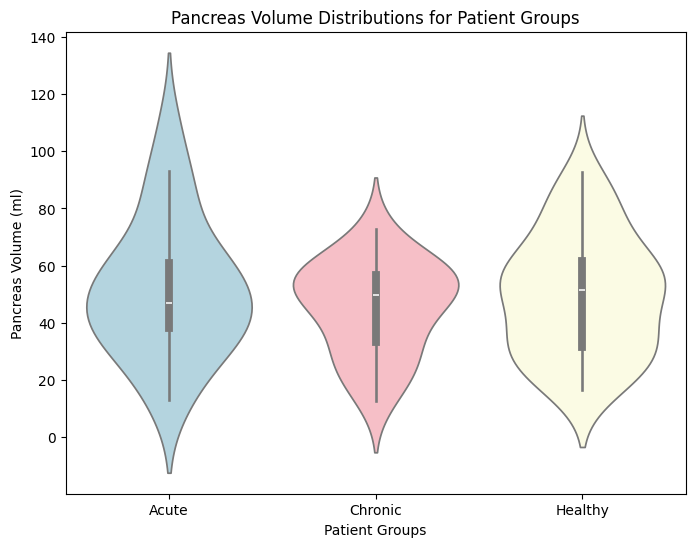

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

group_A = acute_samples['volume_gt(milliliter)'].to_numpy()
group_B = chronic_samples['volume_gt(milliliter)'].to_numpy()
group_C = normal_samples['volume_gt(milliliter)'].to_numpy()

# Creating a DataFrame for plotting
df = pd.DataFrame({
    'Pancreas Volume': np.concatenate([group_A, group_B, group_C]),
    'Assesment': ['Acute'] * len(group_A) + ['Chronic'] * len(group_B) + ['Healthy'] * len(group_C)
})

# Plotting the violin graph
plt.figure(figsize=(8, 6))
# setting color
palette = {'Acute': 'lightblue', 'Chronic': 'lightpink', 'Healthy': 'lightyellow'}
sns.violinplot(x='Assesment', y='Pancreas Volume', data=df,palette=palette)

# Adding percentile lines
# for i, group in enumerate(['Acute', 'Chronic', 'Normal']):
#     group_data = df[df['Assesment'] == group]['Pancreas Volume']
    
#     # Calculate percentiles
#     p25 = np.percentile(group_data, 25)
#     p50 = np.percentile(group_data, 50)
#     p75 = np.percentile(group_data, 75)
    
#     # Plot percentile lines with different colors
#     plt.plot([i - 0.2, i + 0.2], [p25, p25], color='darkred', linewidth=2, label="25th Percentile" if i == 0 else "")
#     plt.plot([i - 0.2, i + 0.2], [p50, p50], color='black', linewidth=2, label="50th Percentile (Median)" if i == 0 else "")
#     plt.plot([i - 0.2, i + 0.2], [p75, p75], color='darkorange', linewidth=2, label="75th Percentile" if i == 0 else "")


# plt.legend(loc='upper center',fontsize= 'small')

plt.title('Pancreas Volume Distributions for Patient Groups')
plt.ylabel('Pancreas Volume (ml)')
plt.xlabel('Patient Groups')
plt.show()

C:\Users\sugar\AppData\Local\Temp\ipykernel_9224\1287855472.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Assesment', y='Pancreas Volume', data=df,palette=palette)


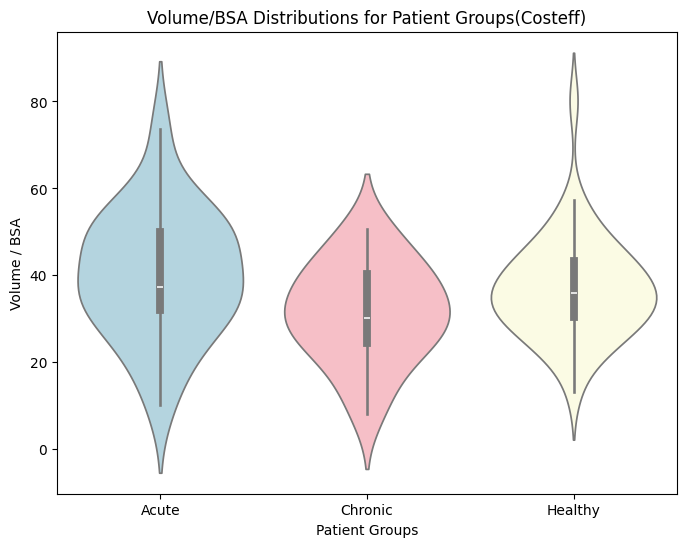

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

group_A = acute_samples['VOLUME/BSA_1'.lower()].to_numpy()
group_B = chronic_samples['VOLUME/BSA_1'.lower()].to_numpy()
group_C = normal_samples['VOLUME/BSA_1'.lower()].to_numpy()

# Creating a DataFrame for plotting
df = pd.DataFrame({
    'Pancreas Volume': np.concatenate([group_A, group_B, group_C]),
    'Assesment': ['Acute'] * len(group_A) + ['Chronic'] * len(group_B) + ['Healthy'] * len(group_C)
})

# Plotting the violin graph
plt.figure(figsize=(8, 6))
# setting color
palette = {'Acute': 'lightblue', 'Chronic': 'lightpink', 'Healthy': 'lightyellow'}
sns.violinplot(x='Assesment', y='Pancreas Volume', data=df,palette=palette)

# Adding percentile lines
# for i, group in enumerate(['Acute', 'Chronic', 'Normal']):
#     group_data = df[df['Assesment'] == group]['Pancreas Volume']
    
#     # Calculate percentiles
#     p25 = np.percentile(group_data, 25)
#     p50 = np.percentile(group_data, 50)
#     p75 = np.percentile(group_data, 75)

#     # Plot percentile lines with different colors
#     plt.plot([i - 0.2, i + 0.2], [p25, p25], color='darkred', linewidth=2, label="25th Percentile" if i == 0 else "")
#     plt.plot([i - 0.2, i + 0.2], [p50, p50], color='black', linewidth=2, label="50th Percentile (Median)" if i == 0 else "")
#     plt.plot([i - 0.2, i + 0.2], [p75, p75], color='darkorange', linewidth=2, label="75th Percentile" if i == 0 else "")


# plt.legend(loc='upper center',fontsize= 'small')

plt.title('Volume/BSA Distributions for Patient Groups(Costeff)')
plt.ylabel('Volume / BSA')
plt.xlabel('Patient Groups')
plt.show()

C:\Users\sugar\AppData\Local\Temp\ipykernel_9224\1815961022.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Assesment', y='Pancreas Volume', data=df,palette=palette)


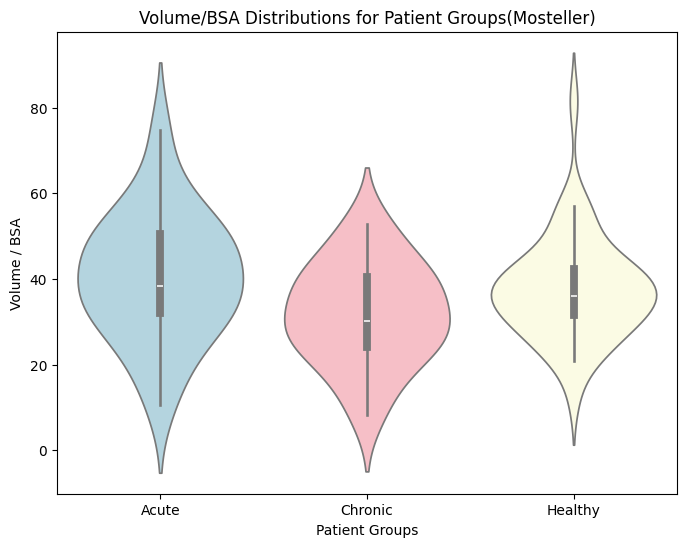

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

group_A = acute_samples['VOLUME/BSA_2'.lower()].to_numpy()
group_B = chronic_samples['VOLUME/BSA_2'.lower()].to_numpy()
group_C = normal_samples['VOLUME/BSA_2'.lower()].to_numpy()

# Creating a DataFrame for plotting
df = pd.DataFrame({
    'Pancreas Volume': np.concatenate([group_A, group_B, group_C]),
    'Assesment': ['Acute'] * len(group_A) + ['Chronic'] * len(group_B) + ['Healthy'] * len(group_C)
})

# Plotting the violin graph
plt.figure(figsize=(8, 6))
# setting color
palette = {'Acute': 'lightblue', 'Chronic': 'lightpink', 'Healthy': 'lightyellow'}
sns.violinplot(x='Assesment', y='Pancreas Volume', data=df,palette=palette)

# Adding percentile lines
# for i, group in enumerate(['Acute', 'Chronic', 'Normal']):
#     group_data = df[df['Assesment'] == group]['Pancreas Volume']
    
    # Calculate percentiles
    # p25 = np.percentile(group_data, 25)
    # p50 = np.percentile(group_data, 50)
    # p75 = np.percentile(group_data, 75)
    
    # Plot percentile lines with different colors
    # plt.plot([i - 0.2, i + 0.2], [p25, p25], color='darkred', linewidth=2, label="25th Percentile" if i == 0 else "")
    # plt.plot([i - 0.2, i + 0.2], [p50, p50], color='black', linewidth=2, label="50th Percentile (Median)" if i == 0 else "")
    # plt.plot([i - 0.2, i + 0.2], [p75, p75], color='darkorange', linewidth=2, label="75th Percentile" if i == 0 else "")


# plt.legend(loc='upper center',fontsize= 'small')

plt.title('Volume/BSA Distributions for Patient Groups(Mosteller)')
plt.ylabel('Volume / BSA')
plt.xlabel('Patient Groups')
plt.show()